# **Dados**

# MyAnimeList Database 2020

This dataset contains information about 17.562 anime and the preference from 325.772 different users. In particular, this dataset contain:

*   The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
*   Ratings given by users to the animes that they has watched completely.
*   Information about the anime like genre, stats, studio, etc.
*   HTML with anime information to do data scrapping. These files contain information such as reviews, synopsis, information about the staff, anime statistics, genre, etc.

# **Setup Inicial**

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/melissafalcao/TAGDI/main/Dataset/anime.csv?token=AHWTHUH6XXTC4Y5MMNW6SNTA6M5EY", encoding ="UTF-8")
data2 = pd.read_csv("https://raw.githubusercontent.com/melissafalcao/TAGDI/main/Dataset/anime_with_synopsis.csv?token=AHWTHUB7IQAUPA4CM4XAUBLA6M5GO", encoding ="UTF-8")

# **Analise básica**

In [ ]:
data

,MAL_ID,Name,Score,Genders,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,Unknown,Unknown,Unknown,Novel,Unknown,Unknown,Unknown,13116,354,6,0,0,0,0,354,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,Kadokawa,Unknown,Passione,Manga,Unknown,Unknown,Unknown,17562,7010,70,14,0,14,0,6982,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,Unknown,Unknown,Unknown,Visual novel,Unknown,R - 17+ (violence & profanity),Unknown,17558,11309,48,3,0,0,0,11306,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,Kadokawa,Unknown,8bit,Manga,Unknown,PG-13 - Teens 13 or older,Unknown,17565,1386,2,13,2,2,1,1368,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genders        17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [ ]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genders    16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MAL_ID,17562.0,21477.192347,14900.093170,1.0,5953.5,22820.0,35624.75,48492.0
Popularity,17562.0,8763.452340,5059.327278,0.0,4383.5,8762.5,13145.00,17565.0
Members,17562.0,34658.539517,125282.141428,1.0,336.0,2065.0,13223.25,2589552.0
Favorites,17562.0,457.746270,4063.473313,0.0,0.0,3.0,31.00,183914.0
Watching,17562.0,2231.487758,14046.688133,0.0,13.0,73.0,522.00,887333.0
Completed,17562.0,22095.571347,91009.188504,0.0,111.0,817.5,6478.00,2182587.0
On-Hold,17562.0,955.049653,4275.675096,0.0,6.0,45.0,291.75,187919.0
Dropped,17562.0,1176.599533,4740.348653,0.0,37.0,77.0,271.00,174710.0
Plan to Watch,17562.0,8199.831227,23777.691963,1.0,112.0,752.5,4135.50,425531.0


In [ ]:
data.dtypes

MAL_ID            int64
Name             object
Score            object
Genders          object
English name     object
Japanese name    object
Type             object
Episodes         object
Aired            object
Premiered        object
Producers        object
Licensors        object
Studios          object
Source           object
Duration         object
Rating           object
Ranked           object
Popularity        int64
Members           int64
Favorites         int64
Watching          int64
Completed         int64
On-Hold           int64
Dropped           int64
Plan to Watch     int64
Score-10         object
Score-9          object
Score-8          object
Score-7          object
Score-6          object
Score-5          object
Score-4          object
Score-3          object
Score-2          object
Score-1          object
dtype: object

In [ ]:
data['Episodes'] = data['Episodes'].fillna(value=1)

In [ ]:
(data.isnull().sum() / 17562) * 100

MAL_ID           0.0
Name             0.0
Score            0.0
Genders          0.0
English name     0.0
Japanese name    0.0
Type             0.0
Episodes         0.0
Aired            0.0
Premiered        0.0
Producers        0.0
Licensors        0.0
Studios          0.0
Source           0.0
Duration         0.0
Rating           0.0
Ranked           0.0
Popularity       0.0
Members          0.0
Favorites        0.0
Watching         0.0
Completed        0.0
On-Hold          0.0
Dropped          0.0
Plan to Watch    0.0
Score-10         0.0
Score-9          0.0
Score-8          0.0
Score-7          0.0
Score-6          0.0
Score-5          0.0
Score-4          0.0
Score-3          0.0
Score-2          0.0
Score-1          0.0
dtype: float64

In [ ]:
data.corr()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
MAL_ID,1.000000,0.355529,-0.049188,-0.042297,0.023305,-0.056154,-0.068658,-0.031585,-0.039359
Popularity,0.355529,1.000000,-0.418699,-0.185933,-0.245257,-0.373770,-0.338071,-0.363674,-0.497297
Members,-0.049188,-0.418699,1.000000,0.778583,0.617074,0.976723,0.793760,0.758595,0.871980
Favorites,-0.042297,-0.185933,0.778583,1.000000,0.607484,0.749235,0.739112,0.588051,0.625559
Watching,0.023305,-0.245257,0.617074,0.607484,1.000000,0.477639,0.737078,0.657783,0.568709
Completed,-0.056154,-0.373770,0.976723,0.749235,0.477639,1.000000,0.685647,0.669724,0.779772
On-Hold,-0.068658,-0.338071,0.793760,0.739112,0.737078,0.685647,1.000000,0.896418,0.763963
Dropped,-0.031585,-0.363674,0.758595,0.588051,0.657783,0.669724,0.896418,1.000000,0.684445
Plan to Watch,-0.039359,-0.497297,0.871980,0.625559,0.568709,0.779772,0.763963,0.684445,1.000000


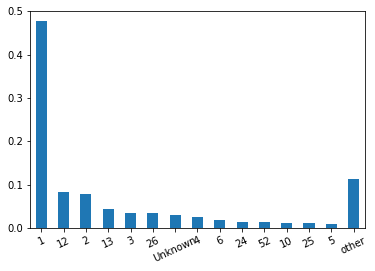

In [ ]:
prob = data['Episodes'].value_counts(normalize=True)
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

# **Pre-processamento**

### **Unknown para None**

In [ ]:
#Nos dados tinhamos muitos valores Unknown nas colunas. Para trata-los de maneira diferente para cada caso primeiro mudamos todos para None.
for (columnName, columnData) in data.iteritems():
      data.loc[data[columnName] == 'Unknown', columnName] = None

### **Coluna Aired**

In [ ]:
#Essa função vai ser utilizada na divisão da coluna Aired nas 2 colunas: Estreia e Finished.
def find_year(x):
  x = x.replace(',','')
  x = x.split()
  for y in x:
    if(len(y) == 4):
      return y
  

In [ ]:
#A coluna Aiered tem o inicio e fim dos animes. Como a Premiered que seria o inicio tem mais dde 70% dos valores faltantes e seria excluída, [...]
#[...] nós optamos por usar a coluna Aired pra criar 2 colunas Estreia e Finished.
data['Finished'] = list(map(lambda x: x.split()[-1] if x else None, data['Aired']))
data['Estreia'] = list(map(lambda x: find_year(x) if x else None , data['Aired']))
data.loc[data['Finished'] == '?', 'Finished'] = '2021'

### **Mudança de tipos**

In [ ]:
# Ajustes de tipos. Objeto para categorico, objeto para float e float para int.

data['Name'] = data['Name'].astype('category')
#data['Genders'] = data['Genders'].astype('category')
data['Score'] = data['Score'].astype('float64')
data['Type'] = data['Type'].astype('category')
data['Aired'] = data['Aired'].astype('category')
data['Producers'] = data['Producers'].astype('category')
data['Licensors'] = data['Licensors'].astype('category')
data['Duration'] = data['Duration'].astype('category')
#data['Studios'] = data['Studios'].astype('category')
data['Source'] = data['Source'].astype('category')
data['Rating'] = data['Rating'].astype('category')
data['Episodes'] = data['Episodes'].astype('float64')
data['Ranked'] = data['Ranked'].astype('float64')
data['Finished'] = data['Finished'].astype('float64')
data['Estreia'] = data['Estreia'].astype('float64')

data['Score-10'] = data['Score-10'].astype('float64')
data['Score-9'] = data['Score-9'].astype('float64')
data['Score-8'] = data['Score-8'].astype('float64')
data['Score-7'] = data['Score-7'].astype('float64')
data['Score-6'] = data['Score-6'].astype('float64')
data['Score-5'] = data['Score-5'].astype('float64')
data['Score-4'] = data['Score-4'].astype('float64')
data['Score-3'] = data['Score-3'].astype('float64')
data['Score-2'] = data['Score-2'].astype('float64')
data['Score-1'] = data['Score-1'].astype('float64')

#Devido ao formato dos dados na tabela (com o .0) precisamos primeiro passar para float e depois para inteiro.
#Usamos o astype(pd.Int32Dtype() para poder fazer a mudança mesmo contendo valores None

data['Episodes'] = data['Episodes'].astype(pd.Int32Dtype()) 
data['Ranked'] = data['Ranked'].astype(pd.Int32Dtype()) 
data['Finished'] = data['Finished'].astype(pd.Int32Dtype())
data['Estreia'] = data['Estreia'].astype(pd.Int32Dtype())
data['Score-10'] = data['Score-10'].astype(pd.Int32Dtype()) 
data['Score-9'] = data['Score-9'].astype(pd.Int32Dtype())
data['Score-8'] = data['Score-8'].astype(pd.Int32Dtype())
data['Score-7'] = data['Score-7'].astype(pd.Int32Dtype())
data['Score-6'] = data['Score-6'].astype(pd.Int32Dtype())
data['Score-5'] = data['Score-5'].astype(pd.Int32Dtype())
data['Score-4'] = data['Score-4'].astype(pd.Int32Dtype())
data['Score-3'] = data['Score-3'].astype(pd.Int32Dtype())
data['Score-2'] = data['Score-2'].astype(pd.Int32Dtype())
data['Score-1'] = data['Score-1'].astype(pd.Int32Dtype())





In [ ]:
#Visualização pós conversão e criação das 2 colunas novas.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MAL_ID,17562.0,21477.192347,14900.093170,1.00,5953.50,22820.00,35624.75,48492.00
Score,12421.0,6.509999,0.886717,1.85,5.93,6.52,7.14,9.19
Episodes,17046.0,11.525519,47.348640,1.00,1.00,2.00,12.00,3057.00
Ranked,15800.0,7895.210000,4557.318490,0.00,3944.00,7896.00,11845.25,15780.00
Popularity,17562.0,8763.452340,5059.327278,0.00,4383.50,8762.50,13145.00,17565.00
Members,17562.0,34658.539517,125282.141428,1.00,336.00,2065.00,13223.25,2589552.00
Favorites,17562.0,457.746270,4063.473313,0.00,0.00,3.00,31.00,183914.00
Watching,17562.0,2231.487758,14046.688133,0.00,13.00,73.00,522.00,887333.00
Completed,17562.0,22095.571347,91009.188504,0.00,111.00,817.50,6478.00,2182587.00
On-Hold,17562.0,955.049653,4275.675096,0.00,6.00,45.00,291.75,187919.00


In [ ]:
data.head()

,MAL_ID,Name,Score,Genders,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia
0,1.0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28,39.0,1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170,182126,131625,62330,20688,8904,3184,1357,741,1580,1999,1998
1,5.0,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",None,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159,518.0,273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,30043,49201,49505,22632,5805,1877,577,221,109,379,2001,2001
2,6.0,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266,201.0,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,50229,75651,86142,49432,15376,5838,1965,664,316,533,1998,1998
3,7.0,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481,1467.0,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,2182,4806,10128,11618,5709,2920,1083,353,164,131,2002,2002
4,8.0,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",NaN,Toei Animation,Manga,23 min. per ep.,PG - Children,3710,4369.0,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,312,529,1242,1713,1068,634,265,83,50,27,2005,2004


In [ ]:
#data['Genders'].cat.categories

### **Dados Faltantes**

In [ ]:
print(data.isnull().sum())

MAL_ID               0
Name                 0
Score             5141
Genders             63
English name     10565
Japanese name       48
Type                37
Episodes           516
Aired              309
Premiered        12817
Producers         7794
Licensors        13616
Studios           7079
Source            3567
Duration           555
Rating             688
Ranked            1762
Popularity           0
Members              0
Favorites            0
Watching             0
Completed            0
On-Hold              0
Dropped              0
Plan to Watch        0
Score-10           437
Score-9           3167
Score-8           1371
Score-7            503
Score-6            511
Score-5            584
Score-4            977
Score-3           1307
Score-2           1597
Score-1            459
Finished           309
Estreia            309
dtype: int64


In [ ]:
#Verificando porcentagem de dados faltantes
(data.isnull().sum() / 17562) * 100


MAL_ID            0.000000
Name              0.000000
Score            29.273431
Genders           0.358729
English name     60.158296
Japanese name     0.273317
Type              0.210682
Episodes          2.938162
Aired             1.759481
Premiered        72.981437
Producers        44.379911
Licensors        77.531033
Studios          40.308621
Source           20.310899
Duration          3.160232
Rating            3.917549
Ranked           10.033026
Popularity        0.000000
Members           0.000000
Favorites         0.000000
Watching          0.000000
Completed         0.000000
On-Hold           0.000000
Dropped           0.000000
Plan to Watch     0.000000
Score-10          2.488327
Score-9          18.033254
Score-8           7.806628
Score-7           2.864138
Score-6           2.909691
Score-5           3.325362
Score-4           5.563148
Score-3           7.442205
Score-2           9.093497
Score-1           2.613598
Finished          1.759481
Estreia           1.759481
d

In [ ]:
#Dados faltante nos 25% animes mais populares
populares = data[data.Popularity <= 4400]
populares.isnull().sum()
#O número de dados faltantes cai muito para os animes mais populares. 

MAL_ID              0
Name                0
Score              83
Genders             0
English name     1543
Japanese name       2
Type                7
Episodes           69
Aired              29
Premiered        2032
Producers        1009
Licensors        1700
Studios           130
Source             86
Duration           77
Rating             55
Ranked            175
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
Plan to Watch       0
Score-10           29
Score-9            51
Score-8            50
Score-7            60
Score-6            70
Score-5            76
Score-4            78
Score-3            79
Score-2            81
Score-1            68
Finished           29
Estreia            29
dtype: int64

###**Excluindo linhas**

In [ ]:
#Pelo menos 28 das 35 colunas precisam ter valores não nulos.
data = data.dropna(thresh=28)

In [ ]:
#Essa modificação traz uma melhora significante nos valores faltantes.
(data.isnull().sum() / 17562) * 100

MAL_ID            0.000000
Name              0.000000
Score            23.909577
Genders           0.199294
English name     55.517595
Japanese name     0.210682
Type              0.000000
Episodes          1.138822
Aired             0.113882
Premiered        68.186995
Producers        39.978362
Licensors        72.184261
Studios          36.556201
Source           19.018335
Duration          0.774399
Rating            2.032798
Ranked            7.823710
Popularity        0.000000
Members           0.000000
Favorites         0.000000
Watching          0.000000
Completed         0.000000
On-Hold           0.000000
Dropped           0.000000
Plan to Watch     0.000000
Score-10          0.387200
Score-9          13.312835
Score-8           4.111149
Score-7           0.364423
Score-6           0.199294
Score-5           0.182212
Score-4           1.577269
Score-3           3.131762
Score-2           4.521125
Score-1           0.176517
Finished          0.113882
Estreia           0.113882
d

###**Dropando Colunas**

In [ ]:
#Premiered e Licensors foram removidas pois são colunas que apresentaram mais de 70% dos dados faltantes.
#MAL_ID é um identificador do site que foi estraido os dados para cada anime, não é relevante para nossa pesquisa.
#As colunas de nome em inglês e japonês também não são relevantes para a aplicação.
#Premiered tinham muitos dados faltantes e com a coluna Aired criamos a coluna Estreia que substitui sua função.
#O rank é definido a partir do score, por tanto não precisamos dessa informação. Caso quisermos basta analisar a coluna score.
#A popularidade é definida em função da quantia de membros, então também não precisamos dela.

data = data.drop(columns=['MAL_ID','English name', 'Japanese name', 'Premiered', 'Licensors', 'Ranked','Aired','Popularity'])



```
# This is formatted as code
```

### **Score**

In [ ]:
#Excluindo linhas com valores nulos
#O score é baseado nas notas, animes sem score não são relevantes para a aplicação.
scoreNulo = data[data['Score'] == None ].index
data.drop(scoreNulo , inplace=True)


### **Missing**

In [ ]:
#Alguns dados categoricos optamos por adicionar a categoria Missing (o antigo Unknown), para não inviesar o código com imputações.

#TYPE < 1%
data['Type'] = data['Type'].cat.add_categories('Missing')
data['Type'].fillna("Missing", inplace=True)
#RATING 3%
data['Rating'] = data['Rating'].cat.add_categories('Missing')
data['Rating'].fillna("Missing", inplace=True)
#SOURCE 20% 
data['Source'] = data['Source'].cat.add_categories('Missing')
data['Source'].fillna("Missing", inplace=True)

#data['Genders'] = data['Genders'].cat.add_categories('Missing')
#data['Genders'].fillna("Missing", inplace=True)

data['Producers'] = data['Producers'].cat.add_categories('Missing')
data['Producers'].fillna("Missing", inplace=True)
#data['Studios'] = data['Studios'].cat.add_categories('Missing')
#data['Studios'].fillna("Missing", inplace=True)





### **Genders Lista**

In [ ]:
#Tirando os None
data['Genders'].fillna("Missing",inplace=True)

#Função que vai dividir na vírgula e transformar em lista
def string_to_list(s):
    return  s.split(', ')

#Atribuição
data['GendersList'] = data['Genders'].apply(string_to_list)




In [ ]:
data['GendersList'].head(5)

0    [Action, Adventure, Comedy, Drama, Sci-Fi, Space]
1              [Action, Drama, Mystery, Sci-Fi, Space]
2    [Action, Sci-Fi, Adventure, Comedy, Drama, Sho...
3    [Action, Mystery, Police, Supernatural, Drama,...
4          [Adventure, Fantasy, Shounen, Supernatural]
Name: GendersList, dtype: object

In [ ]:
import itertools
# Gerar uma lista de todos os generos de animes
listaGeneros = sorted(set(itertools.chain.from_iterable(data['GendersList'])))

print(listaGeneros)
print("\nQuantidade de gêneros : " + str(len(listaGeneros)))

['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Missing', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']

Quantidade de gêneros : 44


### **Studios Lista**

In [ ]:
#Tirando os None
data['Studios'].fillna("Missing",inplace=True)

#Função que vai dividir na vírgula e transformar em lista
def string_to_list(s):
    return  s.split(', ')

#Atribuição
data['StudiosList'] = data['Studios'].apply(string_to_list)

In [ ]:
data['Studios'].head(5)

0           Sunrise
1             Bones
2          Madhouse
3           Sunrise
4    Toei Animation
Name: Studios, dtype: object

In [ ]:
import itertools
# Gerar uma lista de todos os generos de animes
listaStudios = sorted(set(itertools.chain.from_iterable(data['Studios'])))

print(listaStudios)
print("\nQuantidade de estudios : " + str(len(listaStudios)))

[' ', '!', '&', "'", '(', ')', '+', ',', '-', '.', '0', '1', '2', '3', '4', '5', '8', '9', ':', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '°', '²', 'é', 'ό', '・']

Quantidade de estudios : 76


### **Imputando Episódios**

In [ ]:
print(data['Episodes'].mean())
print(data['Episodes'].median())
print(data['Episodes'].mode())

11.731668696711328
2.0
0    1
dtype: Int64


In [ ]:
#Imputando a moda em valores faltantes dos Episódios
data['Episodes'] = data['Episodes'].fillna(value=1)

In [ ]:
print(data['Episodes'].mean())
print(data['Episodes'].median())
print(data['Episodes'].mode())

11.602527075812274
2.0
0    1
dtype: Int64


### **Imputando Duração**

In [ ]:
print(data['Duration'].mode())

0    24 min. per ep.
Name: Duration, dtype: category
Categories (312, object): ['1 hr.', '1 hr. 1 min.', '1 hr. 10 min.', '1 hr. 11 min.', ...,
                           '8 min.', '8 min. per ep.', '9 min.', '9 min. per ep.']


In [ ]:
#data['Duration'] = list(map(lambda x: '1h'))
#data['Finished'] = list(map(lambda x: x.split()[-1] if x else None, data['Aired']))

#Moda para 1 episodio e para mais de 1 episodio imputados separadamente. 
data.loc[(data.Duration.isna()) & (data.Episodes == 1), 'Duration'] = '1 hr. 30 min.'
data.loc[(data.Duration.isna()) & (data.Episodes > 1), 'Duration'] = '24 min. per ep.'



### **Imputando Score-1 a Score-10**

In [ ]:
#Os scores de 1 a 10 representam a quantidade de vezes que a nota 1,2,3, ... 10 foi atribuida a obra. 
#Poucos dados faltantes e de obras bem impopulares, que quase não tem membros. Por isso vamos preencher com 1(valor mínimo atribuido) os dados faltantes.

data['Score-1'] = data['Score-1'].fillna(value=1)
data['Score-2'] = data['Score-2'].fillna(value=1)
data['Score-3'] = data['Score-3'].fillna(value=1)
data['Score-4'] = data['Score-4'].fillna(value=1)
data['Score-5'] = data['Score-5'].fillna(value=1)
data['Score-6'] = data['Score-6'].fillna(value=1)
data['Score-7'] = data['Score-7'].fillna(value=1)
data['Score-8'] = data['Score-8'].fillna(value=1)
data['Score-9'] = data['Score-9'].fillna(value=1)
data['Score-10'] = data['Score-10'].fillna(value=1)

### **Imputando Estreia e Finished**

In [ ]:
print(data['Estreia'].mean())
print(data['Estreia'].median())
print(data['Estreia'].mode())

2005.0089759036146
2010.0
0    2017
dtype: Int64


In [ ]:
data['Estreia'] = data['Estreia'].fillna(value=2010)

In [ ]:
print(data['Estreia'].mean())
print(data['Estreia'].median())
print(data['Estreia'].mode())

2005.0149819494584
2010.0
0    2017
dtype: Int64


In [ ]:
print(data['Finished'].mean())
print(data['Finished'].median())
print(data['Finished'].mode())

2005.379518072289
2010.0
0    2017
dtype: Int64


In [ ]:
data['Finished'] = data['Finished'].fillna(value=2005)

In [ ]:
print(data['Finished'].mean())
print(data['Finished'].median())
print(data['Finished'].mode())

2005.379061371841
2010.0
0    2017
dtype: Int64


In [ ]:
data.head(1)

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170,182126,131625,62330,20688,8904,3184,1357,741,1580,1999,1998,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",[Sunrise]


# **Detecção de Outliers**


In [ ]:
data['members_log'] = np.log10(data['Members'])
print(data['members_log'].mad())

0.8349276733770755


In [ ]:
#data['members_log'].hist()

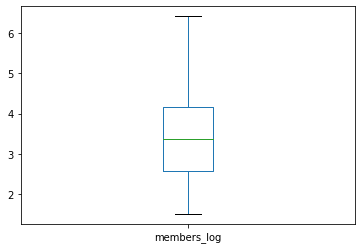

In [ ]:
data['members_log'].plot.box()

In [ ]:
mad = np.abs(data['members_log'] - data['members_log'].median()).median()*(1/0.6745)
print(mad)

1.1654078318309067


In [ ]:
data[np.abs(data['members_log']-data['members_log'].median())/mad > 3.5]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log


Nenhum outlier encontrado pelo Z score robusto

In [ ]:
data[np.abs(data['members_log']-data['members_log'].median())/data['members_log'].mad() > 3.5]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log
1393,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",TV,37,"VAP, Konami, Ashi Production, Nippon Televisio...",Madhouse,Manga,23 min. per ep.,R - 17+ (violence & profanity),2589552.0,145201.0,122401.0,2146116.0,75054.0,80834.0,165147.0,557406,535252,415890,201522,68577,28048,10462,3692,2256,3586,2007,2006,"[Mystery, Police, Psychological, Supernatural,...",[Madhouse],6.413225
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,64,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),2248456.0,183914.0,171871.0,1644938.0,75728.0,32456.0,323463.0,714811,401507,199160,70045,20210,9308,3222,1536,2162,16806,2010,2009,"[Action, Military, Adventure, Comedy, Drama, M...",[Bones],6.351884
6614,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",TV,25,"Aniplex, Genco, DAX Production, ASCII Media Wo...",A-1 Pictures,Light novel,23 min. per ep.,PG-13 - Teens 13 or older,2214395.0,66342.0,80304.0,1907261.0,25632.0,90661.0,110537.0,241049,236672,305386,303813,188431,124819,81155,44204,25371,23472,2012,2012,"[Action, Game, Adventure, Romance, Fantasy]",[A-1 Pictures],6.345255
7449,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",TV,25,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,24 min. per ep.,R - 17+ (violence & profanity),2531397.0,129844.0,140753.0,2182587.0,37345.0,44635.0,126077.0,470882,514879,459113,220228,70768,31141,11805,4637,2707,4939,2013,2013,"[Action, Military, Mystery, Super Power, Drama...",[Wit Studio],6.403360
10451,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",TV,12,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",Madhouse,Web manga,24 min. per ep.,R - 17+ (violence & profanity),2123866.0,54435.0,96568.0,1841220.0,30271.0,26755.0,129052.0,360187,465041,403832,172181,47365,17873,5706,2279,1448,2733,2015,2015,"[Action, Sci-Fi, Comedy, Parody, Super Power, ...",[Madhouse],6.327127


Utlizando o MAD  da biblioteca foram detectados alguns outliers, mas estes outliers são parte legítima do banco de dados, são apenas animes extremamente populares, conhecidos por quase toda a comunidade.


In [ ]:
#Podemos testar também pelo método de tukey
q1 = data['members_log'].quantile(q=0.25)
q3 = data['members_log'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

1.5763773479248981


In [ ]:
data[data['members_log'] < (q1-1.5*iqr)]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log


In [ ]:
data[data['members_log'] < (q1+1.5*iqr)]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min. per ep.,PG - Children,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,312,529,1242,1713,1068,634,265,83,50,27,2005,2004,"[Adventure, Fantasy, Shounen, Supernatural]",[Toei Animation],4.121363
7,Hungry Heart: Wild Striker,7.59,"Slice of Life, Comedy, Sports, Shounen",TV,52,Missing,Nippon Animation,Manga,23 min. per ep.,PG-13 - Teens 13 or older,20470.0,231.0,817.0,13778.0,828.0,1168.0,3879.0,1123,1777,3102,3075,1286,602,218,88,31,32,2003,2002,"[Slice of Life, Comedy, Sports, Shounen]",[Nippon Animation],4.311118
13,Ring ni Kakero 1,6.38,"Action, Shounen, Sports",TV,12,Missing,Toei Animation,Manga,25 min. per ep.,PG - Children,3648.0,16.0,170.0,1333.0,145.0,296.0,1704.0,69,61,152,260,236,143,88,40,32,28,2004,2004,"[Action, Shounen, Sports]",[Toei Animation],3.562055
18,Yakitate!! Japan,7.95,"Comedy, Shounen",TV,69,"TV Tokyo, Aniplex, d-rights, Tohokushinsha Fil...",Sunrise,Manga,24 min. per ep.,PG-13 - Teens 13 or older,80183.0,887.0,5007.0,39992.0,5764.0,4633.0,24787.0,4347,7425,11074,7965,3038,1248,345,118,56,58,2006,2004,"[Comedy, Shounen]",[Sunrise],4.904082
19,Zipang,7.51,"Action, Military, Sci-Fi, Historical, Drama, S...",TV,26,"Marvelous, TBS",Studio Deen,Manga,24 min. per ep.,PG-13 - Teens 13 or older,16652.0,152.0,857.0,6807.0,721.0,599.0,7668.0,430,874,1801,1696,662,279,114,38,13,28,2005,2004,"[Action, Military, Sci-Fi, Historical, Drama, ...",[Studio Deen],4.221466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,Ichi Nichi Shite Narazu,NaN,Slice of Life,ONA,1,Studio Mausu,GEEK TOYS,Original,6 min.,Missing,73.0,0.0,7.0,42.0,1.0,2.0,21.0,1,1,1,2,6,16,2,1,1,1,2021,2021,[Slice of Life],[GEEK TOYS],1.863323
17524,Wan Jie Qi Yuan,NaN,"Martial Arts, Fantasy",ONA,40,iQIYI,Ruo Hong Culture,Original,7 min. per ep.,PG-13 - Teens 13 or older,95.0,1.0,43.0,0.0,5.0,6.0,41.0,1,1,1,1,1,1,1,1,2,1,2021,2021,"[Martial Arts, Fantasy]",[Ruo Hong Culture],1.977724
17526,Ichiban Chikakute Tooi Hoshi,NaN,"Music, Drama",ONA,1,Missing,Flat Studio,Original,1 min.,PG - Children,151.0,2.0,9.0,74.0,2.0,4.0,62.0,1,1,3,11,11,10,1,1,1,1,2021,2021,"[Music, Drama]",[Flat Studio],2.178977
17532,Wo Shi Da Shenxian 2nd Season,NaN,"Action, Martial Arts, Fantasy, Shounen",ONA,16,Tencent Animation & Comics,CG Year,Manga,20 min. per ep.,PG-13 - Teens 13 or older,102.0,0.0,42.0,0.0,3.0,5.0,52.0,1,1,1,8,1,1,1,1,1,1,2021,2021,"[Action, Martial Arts, Fantasy, Shounen]",[CG Year],2.008600


Outliers detectados pelo método de tukey representam apenas animes muito populares (com muitos membros) ou pouco populares (poucos membros)

Foi encontrado um número gigantesco de outliers, mas na verdade as diferentes proporções entre notas 10 e notas 1 dos animes representam apenas a percepção dos membros sobre a qualidade das obras

**Bivariada**

Detectando outliers rem relação as colunas dos números de notas '10' e '1', por que animes que represantam uma quantidade grande de ambas devem ser poucos, sendo assim outliers.

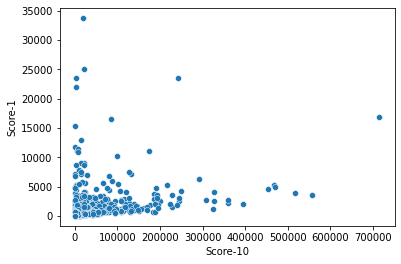

In [ ]:
sns.scatterplot(x=data['Score-10'], y=data['Score-1'])

In [ ]:
data['Score-10/1'] = data['Score-10']/data['Score-1']

In [ ]:
data['Score-10/1'].describe()

count    16620.000000
mean        10.221502
std         19.622100
min          0.027778
25%          1.000000
50%          2.808939
75%         10.000000
max        352.140496
Name: Score-10/1, dtype: float64

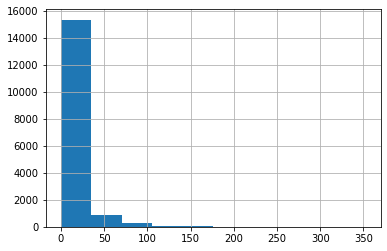

In [ ]:
data['Score-10/1'].hist()

In [ ]:
data['Score-10/1'] = np.log10(data['Score-10/1'])

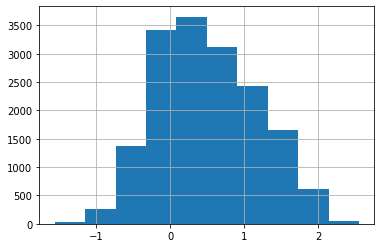

In [ ]:
data['Score-10/1'].hist()

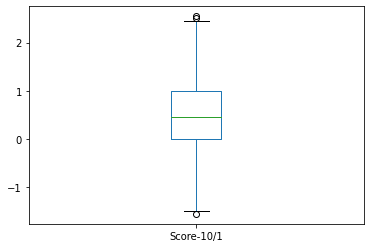

In [ ]:
#Distribuição simétrica, podemos usar o z-score robusto para detecção de outliers
data['Score-10/1'].plot.box()

In [ ]:
mad = np.abs(data['Score-10/1'] - data['Score-10/1'].median()).median()*(1/0.6745)
print(mad)

0.7366151306323756


In [ ]:
data[np.abs(data['Score-10/1']-data['Score-10/1'].median())/mad > 3.5]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log,Score-10/1


Nenhum outlier encontrado pelo Z score robusto

In [ ]:
data[np.abs(data['Score-10/1']-data['Score-10/1'].median())/data['Score-10/1'].mad() > 3.5]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log,Score-10/1
142,Mononoke Hime,8.72,"Action, Adventure, Fantasy",Movie,1,"Tokuma Shoten, Nippon Television Network",Studio Ghibli,Original,2 hr. 15 min.,PG-13 - Teens 13 or older,876813.0,17114.0,11422.0,735624.0,3384.0,1386.0,124997.0,184173,167754,131050,57874,17052,5570,1660,545,283,702,1997,1997,"[Action, Adventure, Fantasy]",[Studio Ghibli],5.942907,2.418889
176,Sen to Chihiro no Kamikakushi,8.83,"Adventure, Supernatural, Drama",Movie,1,Toho,Studio Ghibli,Original,2 hr. 5 min.,PG - Children,1245727.0,25610.0,14444.0,1124666.0,3124.0,1437.0,102056.0,324768,254426,182709,76025,22207,7695,2393,856,489,1174,2001,2001,"[Adventure, Supernatural, Drama]",[Studio Ghibli],6.095423,2.441905
404,Howl no Ugoku Shiro,8.67,"Adventure, Drama, Fantasy, Romance",Movie,1,"d-rights, Tokuma Shoten",Studio Ghibli,Novel,1 hr. 59 min.,G - All Ages,847414.0,17845.0,8733.0,754791.0,2283.0,947.0,80660.0,186983,167309,137336,62317,18427,6427,2246,737,351,668,2004,2004,"[Adventure, Drama, Fantasy, Romance]",[Studio Ghibli],5.928096,2.447026
479,Majo no Takkyuubin,8.24,"Adventure, Comedy, Drama, Magic, Romance, Fantasy",Movie,1,Missing,Studio Ghibli,Novel,1 hr. 45 min.,G - All Ages,377814.0,3695.0,3931.0,323535.0,1498.0,512.0,48338.0,42609,62143,78325,44824,11925,3724,844,229,105,121,1989,1989,"[Adventure, Comedy, Drama, Magic, Romance, Fan...",[Studio Ghibli],5.577278,2.546716
480,Tenkuu no Shiro Laputa,8.31,"Adventure, Fantasy, Romance, Sci-Fi",Movie,1,Tokuma Shoten,Studio Ghibli,Original,2 hr. 5 min.,PG - Children,335428.0,3090.0,3702.0,279056.0,1516.0,633.0,50521.0,42814,54616,63546,35753,10658,3363,904,242,119,131,1986,1986,"[Adventure, Fantasy, Romance, Sci-Fi]",[Studio Ghibli],5.525599,2.514315
5089,Atelier Petros Joukuu Gekijou: Sentaku Shima n...,4.31,"Comedy, Fantasy",ONA,1,The Village of Marchen,Missing,Original,3 min.,G - All Ages,560.0,0.0,9.0,444.0,3.0,32.0,72.0,3,3,1,12,21,39,49,44,63,108,2003,2003,"[Comedy, Fantasy]",[Missing],2.748188,-1.556303


Utlizando o MAD da biblioteca foram detectados alguns outliers, mas na verdade as diferentes proporções entre notas 10 e notas 1 dos animes representam apenas a percepção dos membros sobre a qualidade das obras.

In [ ]:
#Podemos testar também pelo método de tukey
q1 = data['Score-10/1'].quantile(q=0.25)
q3 = data['Score-10/1'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

1.0


In [ ]:
data[data['Score-10/1'] < (q1-3.0*iqr)]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log,Score-10/1


In [ ]:
data[data['Score-10/1'] < (q1+3.0*iqr)]

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log,Score-10/1
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Bandai Visual,Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),1251960.0,61971.0,105808.0,718161.0,71513.0,26678.0,329800.0,229170,182126,131625,62330,20688,8904,3184,1357,741,1580,1999,1998,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",[Sunrise],6.097590,2.161501
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,"Sunrise, Bandai Visual",Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),273145.0,1174.0,4143.0,208333.0,1935.0,770.0,57964.0,30043,49201,49505,22632,5805,1877,577,221,109,379,2001,2001,"[Action, Drama, Mystery, Sci-Fi, Space]",[Bones],5.436393,1.899104
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,Victor Entertainment,Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,558913.0,12944.0,29113.0,343492.0,25465.0,13925.0,146918.0,50229,75651,86142,49432,15376,5838,1965,664,316,533,1998,1998,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",[Madhouse],5.747344,1.974227
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,94683.0,587.0,4300.0,46165.0,5121.0,5378.0,33719.0,2182,4806,10128,11618,5709,2920,1083,353,164,131,2002,2002,"[Action, Mystery, Police, Supernatural, Drama,...",[Sunrise],4.976272,1.221583
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min. per ep.,PG - Children,13224.0,18.0,642.0,7314.0,766.0,1108.0,3394.0,312,529,1242,1713,1068,634,265,83,50,27,2005,2004,"[Adventure, Fantasy, Shounen, Supernatural]",[Toei Animation],4.121363,1.062791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,Ichi Nichi Shite Narazu,NaN,Slice of Life,ONA,1,Studio Mausu,GEEK TOYS,Original,6 min.,Missing,73.0,0.0,7.0,42.0,1.0,2.0,21.0,1,1,1,2,6,16,2,1,1,1,2021,2021,[Slice of Life],[GEEK TOYS],1.863323,0.000000
17524,Wan Jie Qi Yuan,NaN,"Martial Arts, Fantasy",ONA,40,iQIYI,Ruo Hong Culture,Original,7 min. per ep.,PG-13 - Teens 13 or older,95.0,1.0,43.0,0.0,5.0,6.0,41.0,1,1,1,1,1,1,1,1,2,1,2021,2021,"[Martial Arts, Fantasy]",[Ruo Hong Culture],1.977724,0.000000
17526,Ichiban Chikakute Tooi Hoshi,NaN,"Music, Drama",ONA,1,Missing,Flat Studio,Original,1 min.,PG - Children,151.0,2.0,9.0,74.0,2.0,4.0,62.0,1,1,3,11,11,10,1,1,1,1,2021,2021,"[Music, Drama]",[Flat Studio],2.178977,0.000000
17532,Wo Shi Da Shenxian 2nd Season,NaN,"Action, Martial Arts, Fantasy, Shounen",ONA,16,Tencent Animation & Comics,CG Year,Manga,20 min. per ep.,PG-13 - Teens 13 or older,102.0,0.0,42.0,0.0,3.0,5.0,52.0,1,1,1,8,1,1,1,1,1,1,2021,2021,"[Action, Martial Arts, Fantasy, Shounen]",[CG Year],2.008600,0.000000


Foi encontrado um número gigantesco de outliers, mas na verdade as diferentes proporções entre notas 10 e notas 1 dos animes representam apenas a percepção dos membros sobre a qualidade das obras

# **Normalização**

In [ ]:
data2  = data.copy()

In [ ]:
data['Score'] = (data['Score'] - data['Score'].min()) / (data['Score'].max() - data['Score'].min())
data['Episodes'] = (data['Episodes'] - data['Episodes'].min()) / (data['Episodes'].max() - data['Episodes'].min())
data['Members'] = (data['Members'] - data['Members'].min()) / (data['Members'].max() - data['Members'].min())
data['Favorites'] = (data['Favorites'] - data['Favorites'].min()) / (data['Favorites'].max() - data['Favorites'].min())
data['Watching'] = (data['Watching'] - data['Watching'].min()) / (data['Watching'].max() - data['Watching'].min())
data['Completed'] = (data['Completed'] - data['Completed'].min()) / (data['Completed'].max() - data['Completed'].min())
data['On-Hold'] = (data['On-Hold'] - data['On-Hold'].min()) / (data['On-Hold'].max() - data['On-Hold'].min())
data['Dropped'] = (data['Dropped'] - data['Dropped'].min()) / (data['Dropped'].max() - data['Dropped'].min())
data['Score-10'] = (data['Score-10'] - data['Score-10'].min()) / (data['Score-10'].max() - data['Score-10'].min())
data['Score-9'] = (data['Score-9'] - data['Score-9'].min()) / (data['Score-9'].max() - data['Score-9'].min())
data['Score-8'] = (data['Score-8'] - data['Score-8'].min()) / (data['Score-8'].max() - data['Score-8'].min())
data['Score-7'] = (data['Score-7'] - data['Score-7'].min()) / (data['Score-7'].max() - data['Score-7'].min())
data['Score-6'] = (data['Score-6'] - data['Score-6'].min()) / (data['Score-6'].max() - data['Score-6'].min())
data['Score-5'] = (data['Score-5'] - data['Score-5'].min()) / (data['Score-5'].max() - data['Score-5'].min())
data['Score-4'] = (data['Score-4'] - data['Score-4'].min()) / (data['Score-4'].max() - data['Score-4'].min())
data['Score-3'] = (data['Score-3'] - data['Score-3'].min()) / (data['Score-3'].max() - data['Score-3'].min())
data['Score-2'] = (data['Score-2'] - data['Score-2'].min()) / (data['Score-2'].max() - data['Score-2'].min())
data['Score-1'] = (data['Score-1'] - data['Score-1'].min()) / (data['Score-1'].max() - data['Score-1'].min())
data['Score-4'] = (data['Score-4'] - data['Score-4'].min()) / (data['Score-4'].max() - data['Score-4'].min())
data['Finished'] = (data['Finished'] - data['Finished'].min()) / (data['Finished'].max() - data['Finished'].min())
data['Estreia'] = (data['Estreia'] - data['Estreia'].min()) / (data['Estreia'].max() - data['Estreia'].min())



# **Discretização**

In [ ]:
#Coluna de Membros discretizada em 6 pedaços. 
data['MembersClass'] = pd.qcut(data['Members'], 6)
data['MembersClass'] = data['MembersClass'].astype('category')
data['MembersClass'].value_counts()

(0.0129, 1.0]           2770
(0.00273, 0.0129]       2770
(0.000875, 0.00273]     2770
(0.000252, 0.000875]    2770
(8.26e-05, 0.000252]    2770
(-0.001, 8.26e-05]      2770
Name: MembersClass, dtype: int64

In [ ]:
data['MembersClass'].cat.categories = ['D','C','B','A','S','SS']
data['MembersClass'].value_counts()

SS    2770
S     2770
A     2770
B     2770
C     2770
D     2770
Name: MembersClass, dtype: int64

In [ ]:
data.head(5)

,Name,Score,Genders,Type,Episodes,Producers,Studios,Source,Duration,Rating,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,GendersList,StudiosList,members_log,Score-10/1,MembersClass
0,Cowboy Bebop,0.944142,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,0.008181,Bandai Visual,Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),0.483459,0.336956,0.119243,0.329041,0.380552,0.152699,329800.0,0.320601,0.340261,0.286693,0.205156,0.109786,0.071328,0.039222,0.030677,0.029168,0.046787,0.788462,0.778846,"[Action, Adventure, Comedy, Drama, Sci-Fi, Space]",[Sunrise],6.097590,2.161501,SS
1,Cowboy Bebop: Tengoku no Tobira,0.891008,"Action, Drama, Mystery, Sci-Fi, Space",Movie,0.000000,"Sunrise, Bandai Visual",Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),0.105469,0.006383,0.004669,0.095452,0.010297,0.004407,57964.0,0.042028,0.091919,0.107826,0.074490,0.030802,0.015030,0.007098,0.004977,0.004257,0.011200,0.807692,0.807692,"[Action, Drama, Mystery, Sci-Fi, Space]",[Bones],5.436393,1.899104,SS
2,Trigun,0.870572,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,0.008181,Victor Entertainment,Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,0.215824,0.070381,0.032810,0.157378,0.135511,0.079704,146918.0,0.070268,0.141336,0.187625,0.162703,0.081595,0.046764,0.024201,0.014999,0.012416,0.015763,0.778846,0.778846,"[Action, Sci-Fi, Adventure, Comedy, Drama, Sho...",[Madhouse],5.747344,1.974227,SS
3,Witch Hunter Robin,0.738420,"Action, Mystery, Police, Supernatural, Drama, ...",TV,0.008181,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,0.036552,0.003192,0.004846,0.021152,0.027251,0.030782,33719.0,0.003051,0.008977,0.022058,0.038237,0.030292,0.023386,0.013333,0.007963,0.006425,0.003852,0.817308,0.817308,"[Action, Mystery, Police, Supernatural, Drama,...",[Sunrise],4.976272,1.221583,SS
4,Bouken Ou Beet,0.698910,"Adventure, Fantasy, Shounen, Supernatural",TV,0.016688,"TV Tokyo, Dentsu",Toei Animation,Manga,23 min. per ep.,PG - Children,0.005094,0.000098,0.000724,0.003351,0.004076,0.006342,3394.0,0.000435,0.000986,0.002703,0.005635,0.005663,0.005071,0.003253,0.001855,0.001931,0.000770,0.846154,0.836538,"[Adventure, Fantasy, Shounen, Supernatural]",[Toei Animation],4.121363,1.062791,S


# **Analise gráfica**

In [ ]:
#animes mais populares
popular = data.sort_values('Members', ascending=False).head(10).set_index('Name')

0.6348772745111477
0.12080615112112192


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


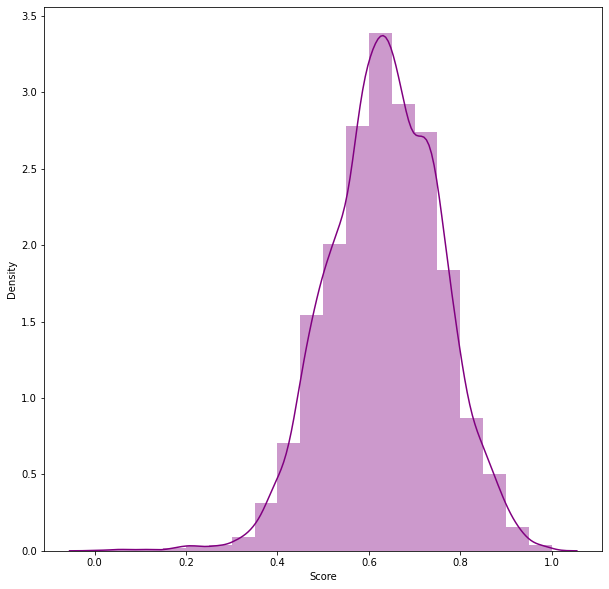

In [ ]:
sns.set_color_codes()

plt.figure(figsize=(10,10))
rating= data.Score.astype(float)
print(data.Score.astype(float).mean())
print(data.Score.astype(float).std())
sns.distplot(rating, bins=20, color="purple")

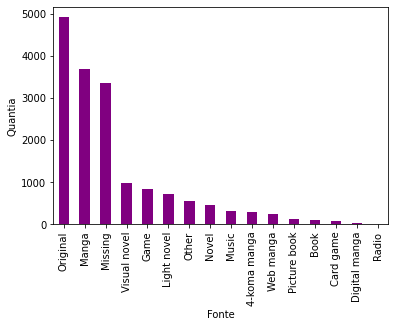

In [ ]:
data['Source'].value_counts().plot(kind='bar', ylabel='Quantia', xlabel='Fonte', color="purple")


Aqui vemos que a maioria dos animes é original, seguidos por muitos animes com origem vinda de adaptações de mangas. Bem abaixo deles depois temos varios outros formatos como jogos, visual novel, light novel, livros, cardgames e etc.

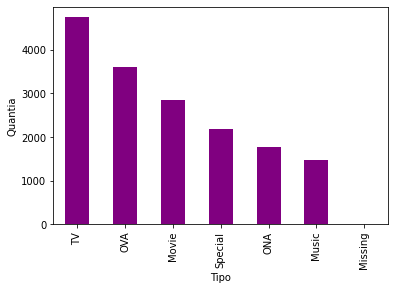

In [ ]:
data['Type'].value_counts().plot(kind='bar', ylabel='Quantia', xlabel='Tipo', color="purple")


Aqui temos informações sobre o tipo da obra. Em primeiro vemos o formato pra tv, que são os animes que são pensados para passar na televisão. Seguindo dele temos o formato OVA que costuma ir ao ar na TV, é produzido diretamente para mídias digitais (antigamente eram vendidos em DVD sem passar na tv). É comum um anime que passa na televisão ter OVAs com histórias paralelas por meio de longa metragens.

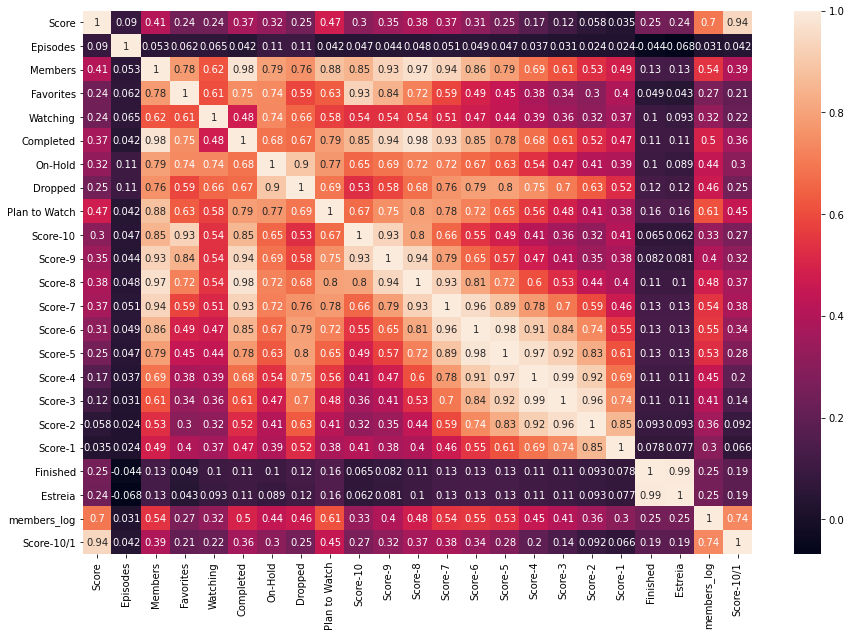

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.show()

**Animes mais bem avaliados**

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_palette("dark")

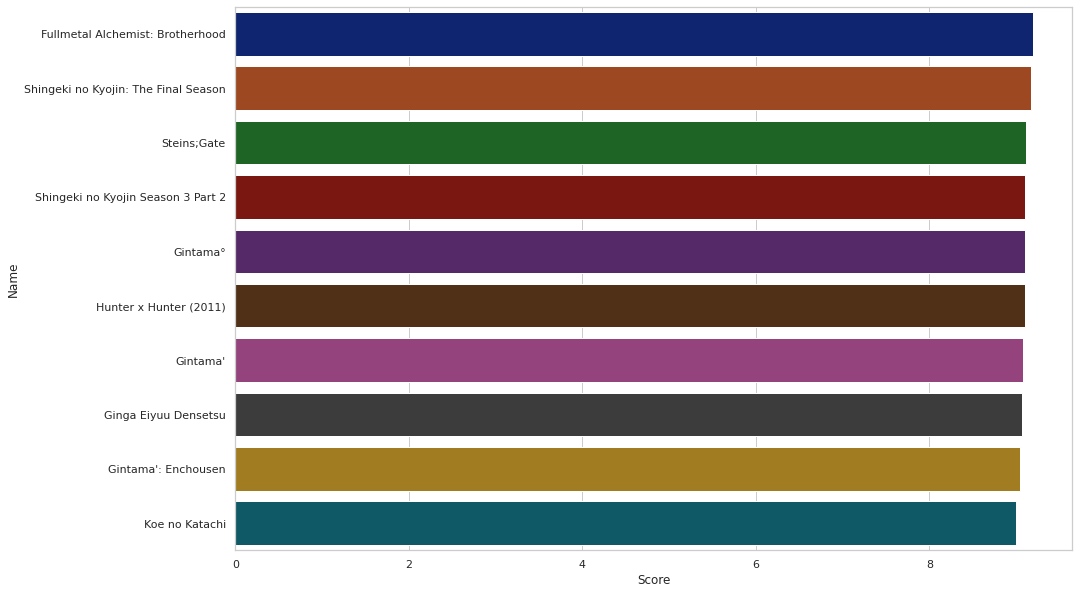

In [ ]:
bestAnime = data2.sort_values('Score', ascending=False).head(10).set_index('Name')
plt.figure(figsize=(15,10))
sns.barplot(x=bestAnime['Score'], y=bestAnime.index, orient='h', order = bestAnime.index)

**Animes mais populares por quantidade de membros**

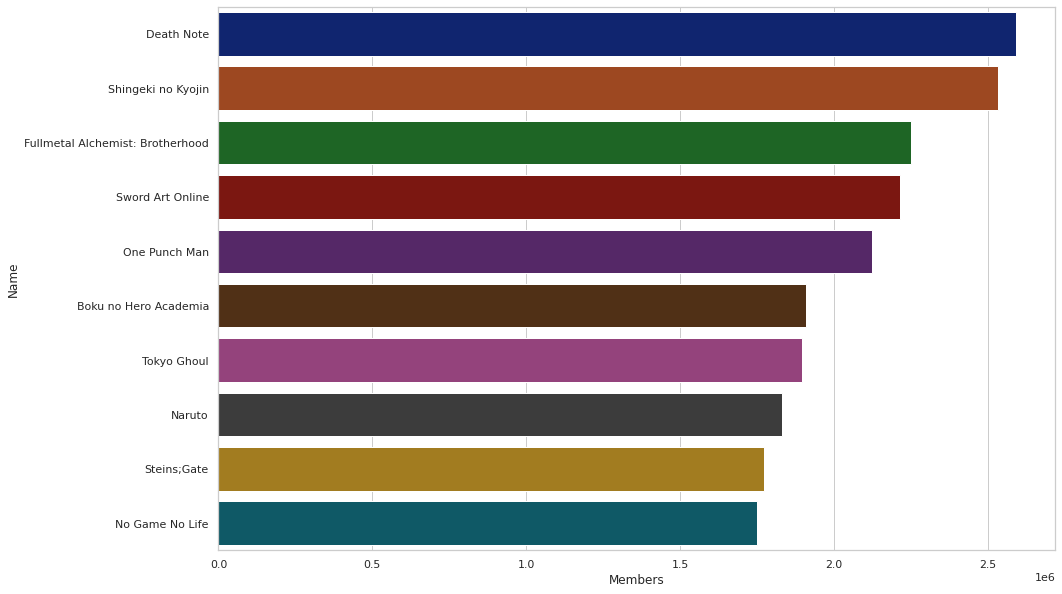

In [ ]:
bestAnime = data2.sort_values('Members', ascending=False).head(10).set_index('Name')
plt.figure(figsize=(15,10))
sns.barplot(x=bestAnime['Members'], y=bestAnime.index, orient='h', order = bestAnime.index)

**Análises sobre os gêneros**

In [ ]:
tempGenres = data2.explode("GendersList")
tempGenres['GendersList'] = tempGenres['GendersList'].astype('category')

**Quantidade de animes por gênero**

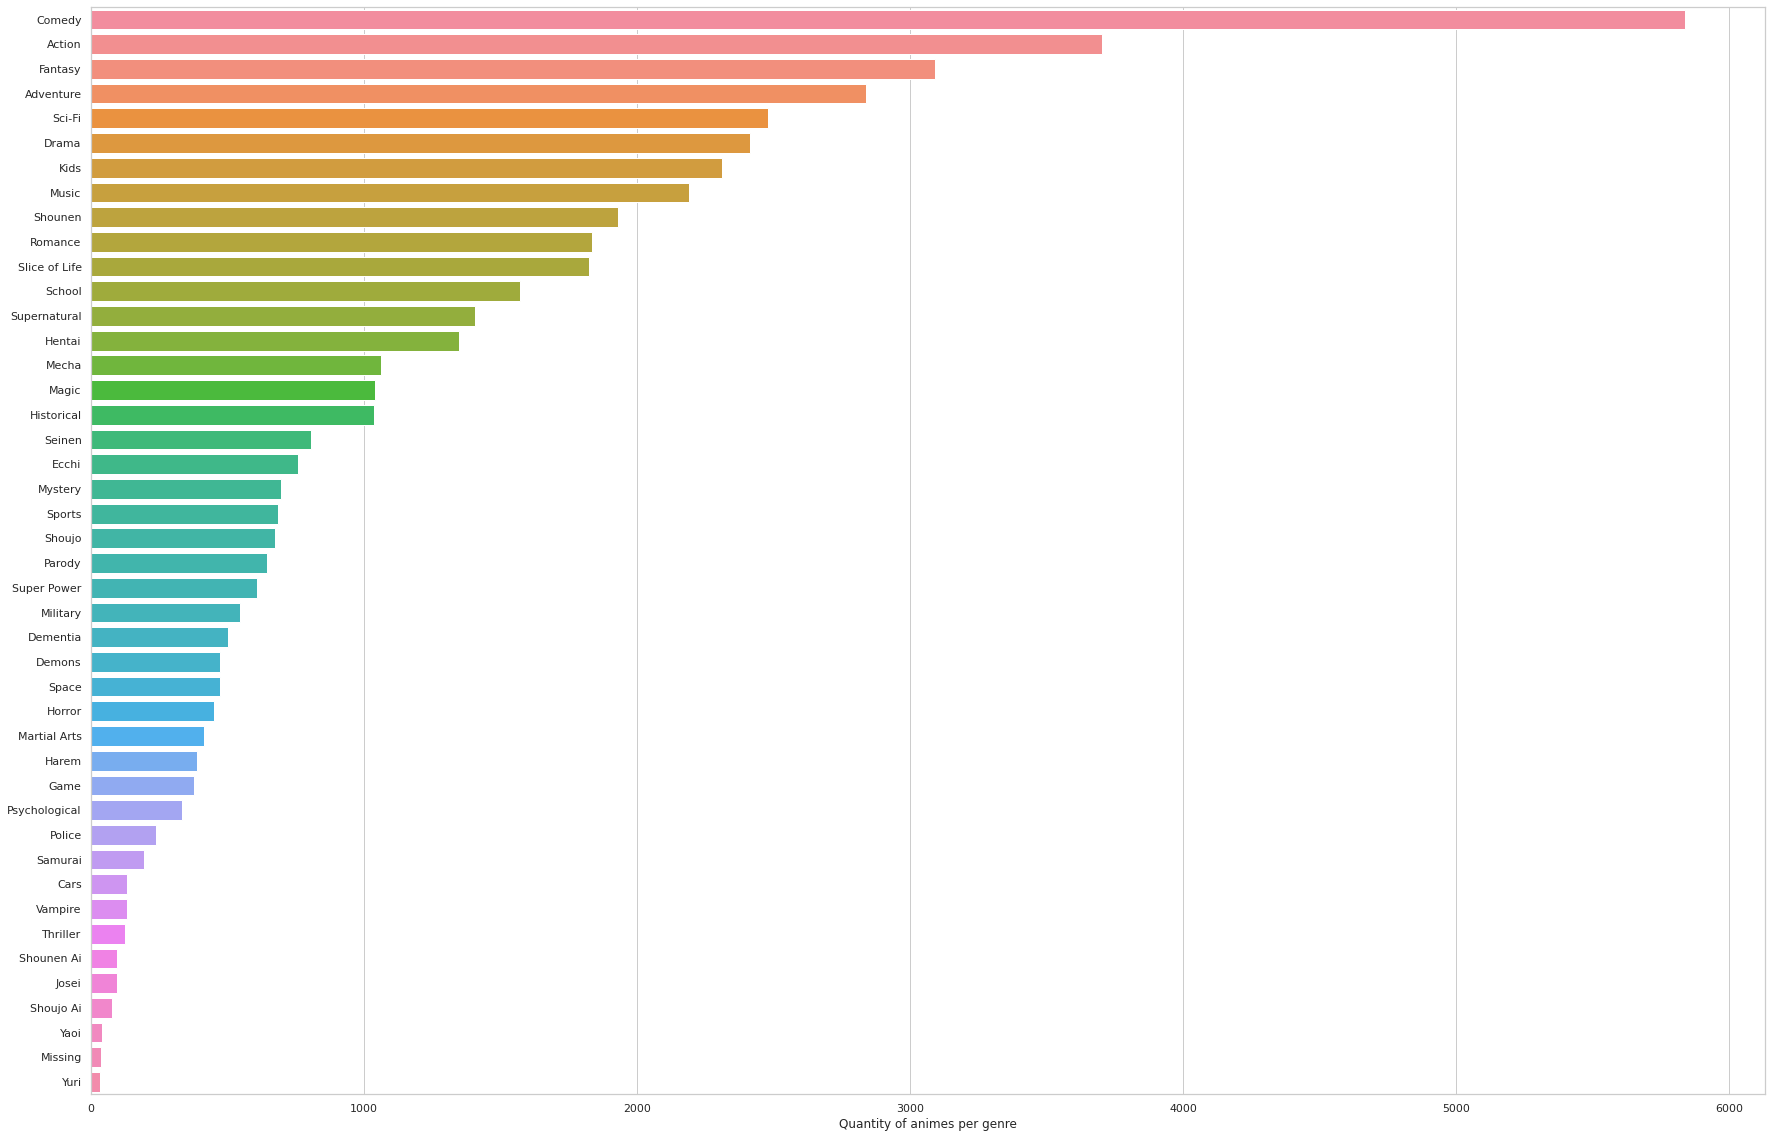

In [ ]:
countGenres = tempGenres['GendersList'].value_counts()
plt.figure(figsize=(30,20))
sns.barplot(x=countGenres.values, y=countGenres.index, orient="h", order=countGenres.index, saturation=0.9)
plt.xlabel("Quantity of animes per genre")
plt.show()

Animes de ação e comédia são os que aparecem em maior quantidade, provavelmente por captarem públicos de todas as idades, enquanto os animes +18 aparecem poucas vezes

**Avaliação geral dos gêneros baseados na nota média**

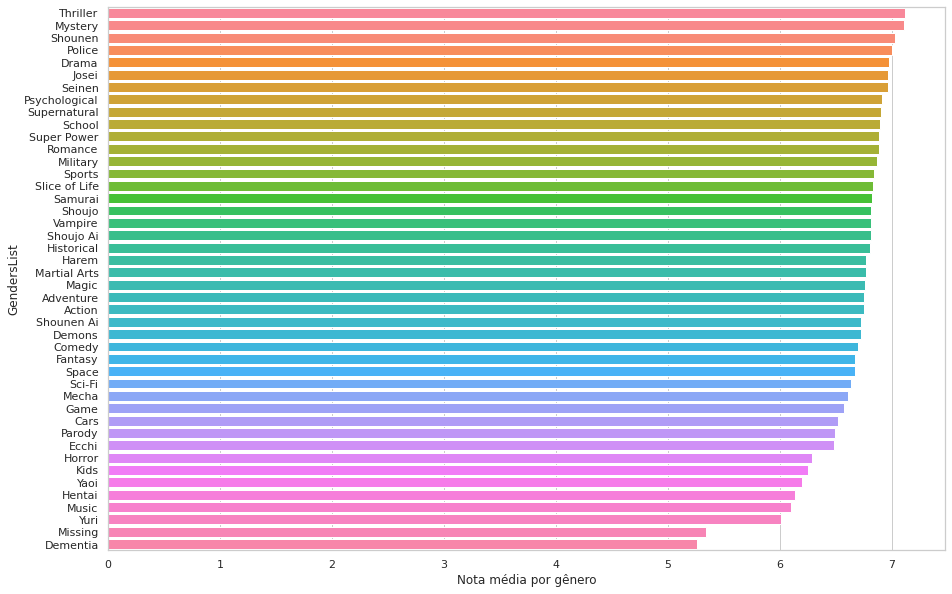

In [ ]:
meanGenres = tempGenres.groupby("GendersList").Score.mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=meanGenres.values, y = meanGenres.index,orient="h", order=meanGenres.index, saturation=10.98)
plt.xlabel("Nota média por gênero")
plt.show()

**Popularidade média dos gêneros baseado no número de membros**

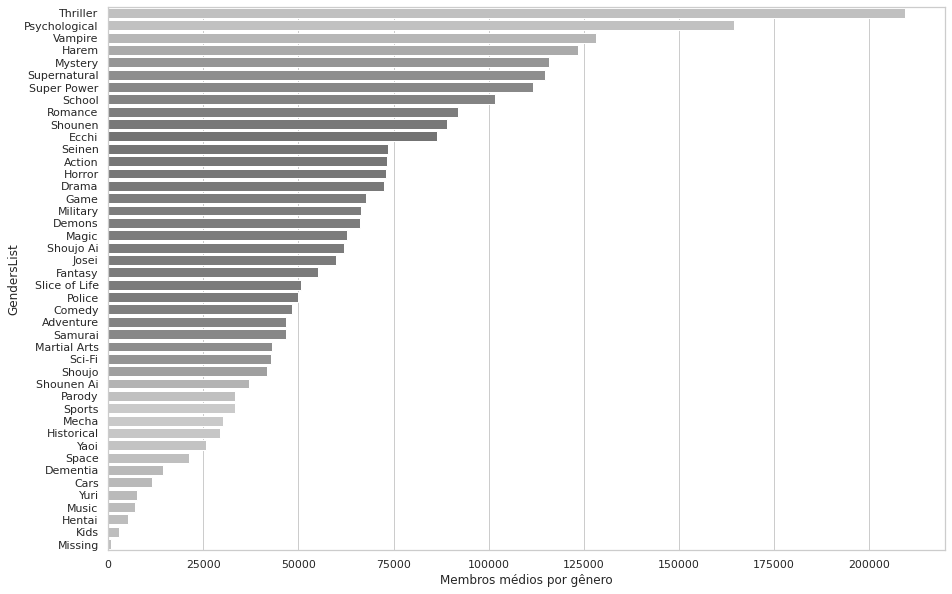

In [ ]:
meanGenres = tempGenres.groupby("GendersList").Members.mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=meanGenres.values, y = meanGenres.index,orient="h", order=meanGenres.index, saturation=0.0)
plt.xlabel("Membros médios por gênero")
plt.show()

Vemos que alguns gêneros bem avaliados também apresentam alta popularidade, sugerindo uma boa correlação entre essas duas colunas

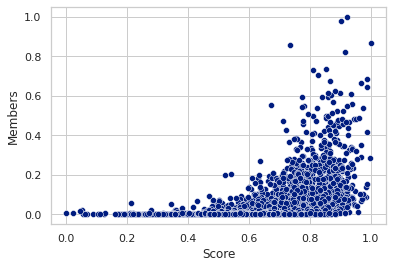

In [ ]:
sns.scatterplot(x=data['Score'], y=data['Members'])

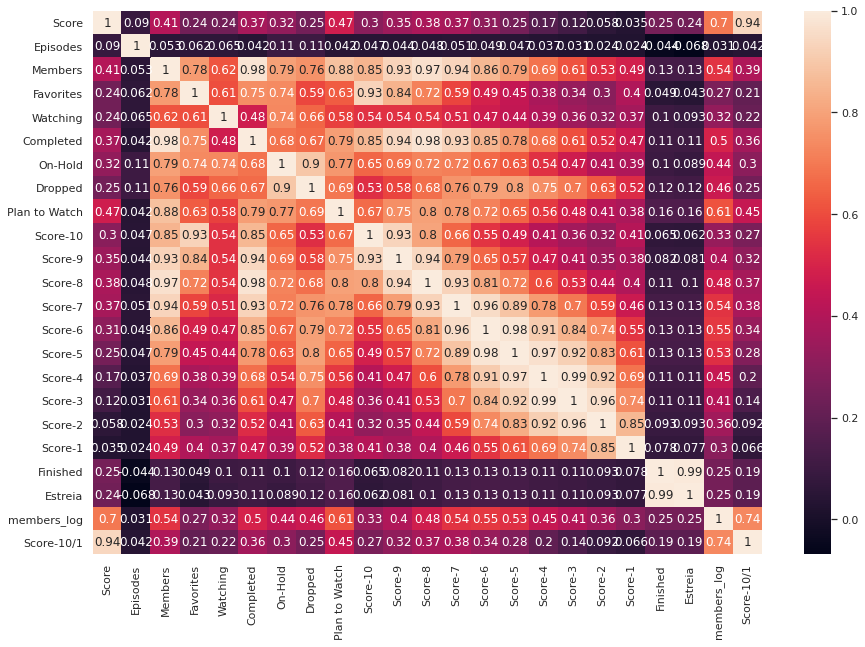

In [ ]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.show()

Pela tabela de correlação, podemos ver que realmente o número de membros é uma das colunas que mais se relaciona com score

**Análise de Estúdios**

In [ ]:
tempStudios = data2.explode("StudiosList")
tempStudios['StudiosList'] = tempStudios['StudiosList'].astype('category')

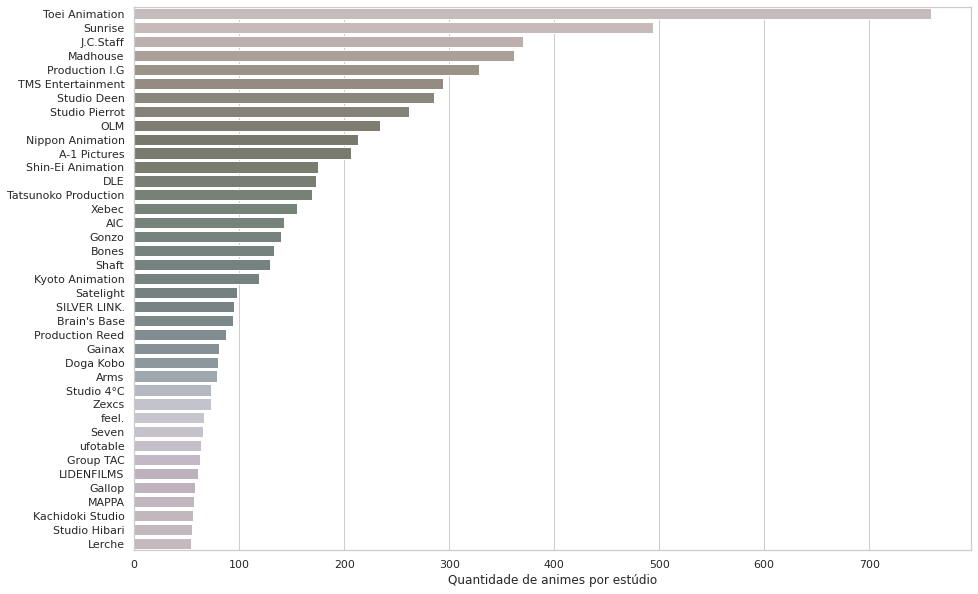

In [ ]:
countStudios = tempStudios['StudiosList'].value_counts()[1:40]
plt.figure(figsize=(15,10))
sns.barplot(x=countStudios.values, y=countStudios.index, orient="h", order=countStudios.index, saturation=0.10)
plt.xlabel('Quantidade de animes por estúdio')
plt.show()

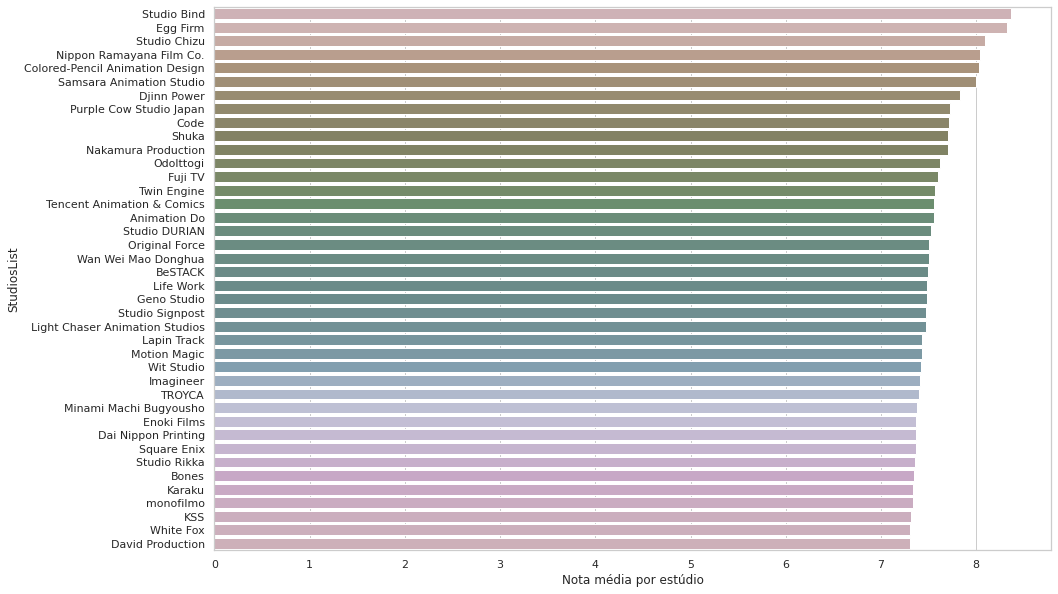

In [ ]:
meanStudios = tempStudios.groupby("StudiosList").Score.mean().sort_values(ascending=False)[:40]
plt.figure(figsize=(15,10))
sns.barplot(x=meanStudios.values, y = meanStudios.index,orient="h", order=meanStudios.index, saturation=0.25)
plt.xlabel("Nota média por estúdio")
plt.show()

Vemos aqui que quantidade nem sempre é o mesmo que qualidade

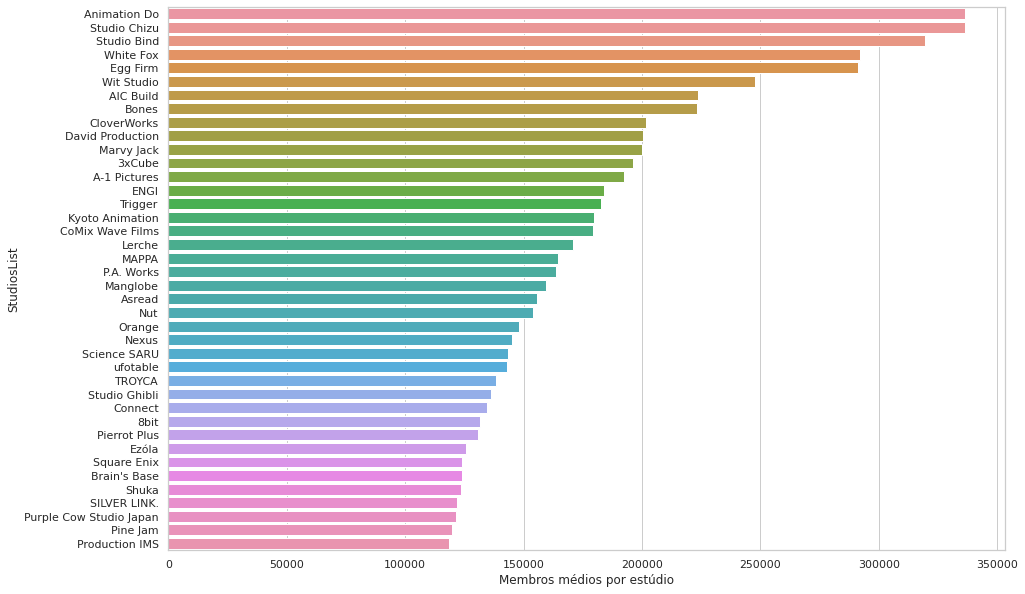

In [ ]:
meanStudios = tempStudios.groupby("StudiosList").Members.mean().sort_values(ascending=False)[:40]
plt.figure(figsize=(15,10))
sns.barplot(x=meanStudios.values, y = meanStudios.index,orient="h", order=meanStudios.index)
plt.xlabel("Membros médios por estúdio")
plt.show()

In [ ]:
data2['Age'] = data2['Finished'] - data2['Estreia']

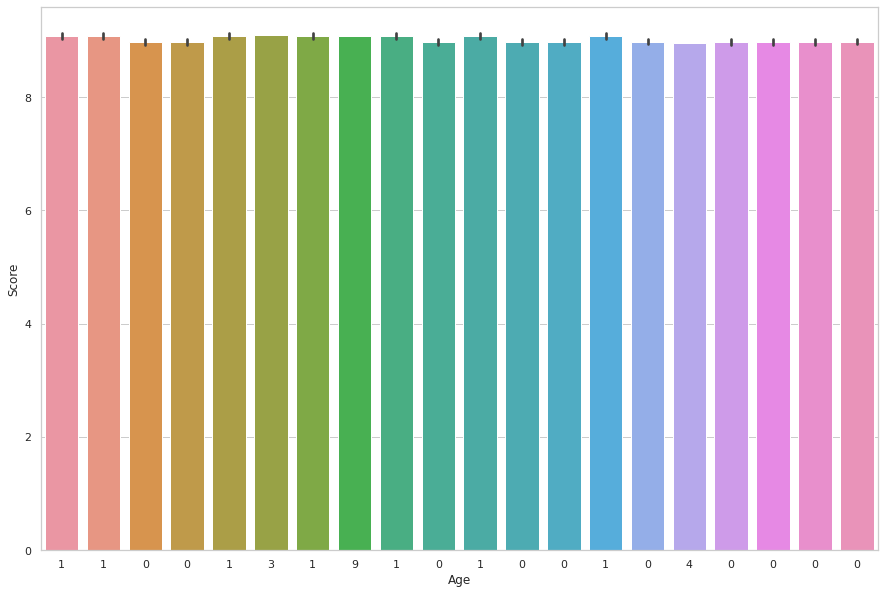

In [ ]:
bestAnime = data2.sort_values('Score', ascending=False).head(20).set_index('Age')
plt.figure(figsize=(15,10))
sns.barplot(x=bestAnime.index, y=bestAnime['Score'], orient='v', order = bestAnime.index)

Nota-se que os animes mais bem avaliadods não duram muitos anos

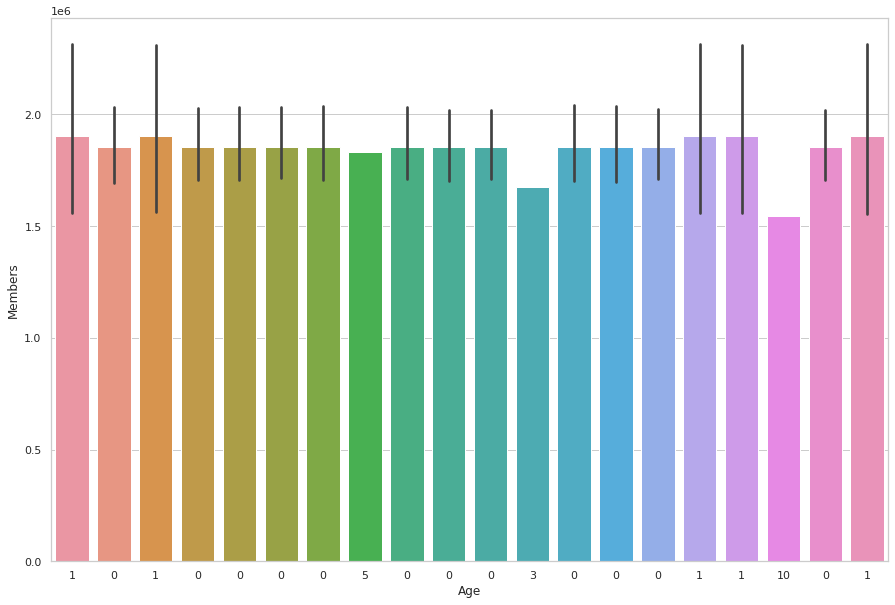

In [ ]:
bestAnime = data2.sort_values('Members', ascending=False).head(20).set_index('Age')
plt.figure(figsize=(15,10))
sns.barplot(x=bestAnime.index, y=bestAnime['Members'], orient='v', order = bestAnime.index)

**Analise das fontes**

A mesma ideia se vê presente ao ver a idade dos animes mais populares

In [ ]:
countSource = data2['Source'].value_counts()

Quantidade de animes agrupados pelo material fonte

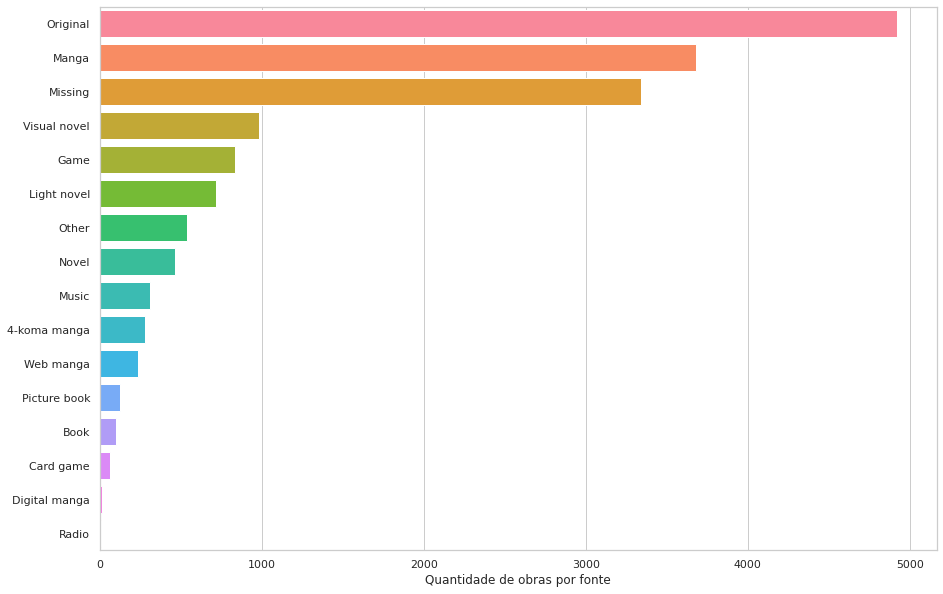

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=countSource.values, y=countSource.index, orient="h", order=countSource.index, saturation=1.2)
plt.xlabel('Quantidade de obras por fonte')
plt.show()

In [ ]:
toei = data2[(data2['Studios'].str.contains('Toei Animation'))]
countSource = toei['Source'].value_counts()


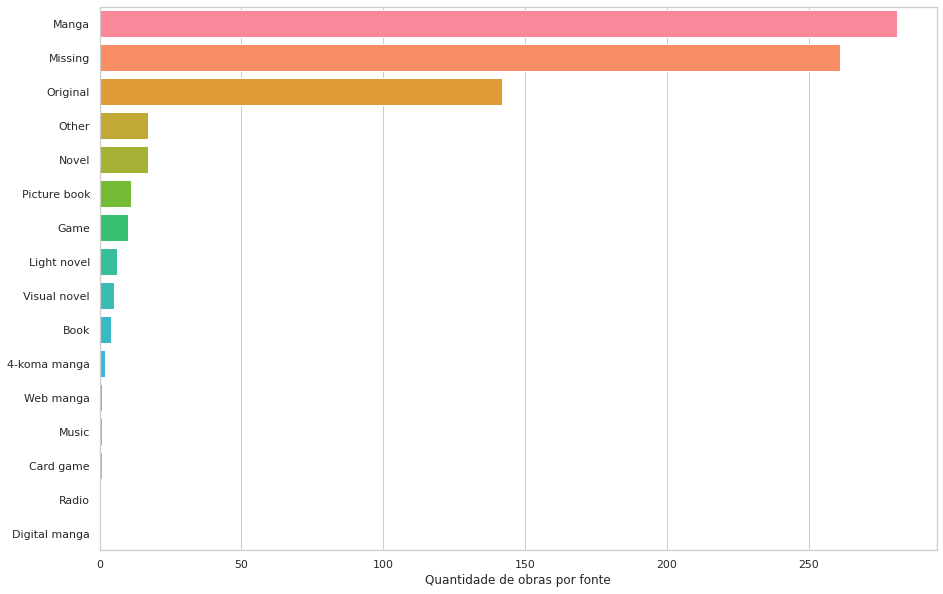

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=countSource.values, y=countSource.index, orient="h", order=countSource.index, saturation =1.2)
plt.xlabel('Quantidade de obras por fonte')
plt.show()

Analisando que tipo de material a  Toei Animation utiliza como fonte, que é o estúdio com maior quantidade de animes.

# **Teste de Hipotese**

In [ ]:
score_notna = data[data['Score'].notna()].Score
members_notna = data[data['Members'].notna()].Members
favorites_notna = data[data['Favorites'].notna()].Favorites

In [ ]:
#como o dataframe tem 17k de entradas vamos usar o metodo de anderson para o teste de hipotese 
#fonte: https://ichi.pro/pt/testes-de-normalidade-em-python-230280637680359

def generate_anderson(data):
    result = stats.anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
      sl, cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
      else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: nan
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


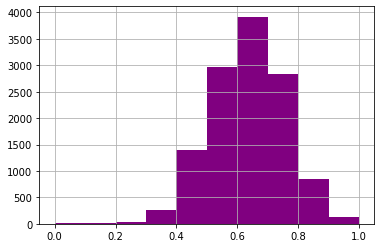

In [ ]:
data.Score.hist(color="purple")
generate_anderson(data.Score)
#Hipotese nula rejeitada

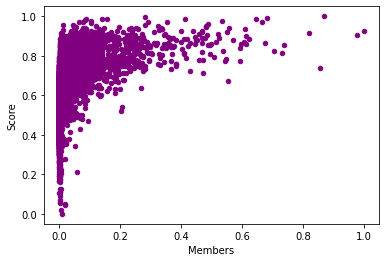

In [ ]:
data.plot.scatter(x='Members',y='Score', color="purple")

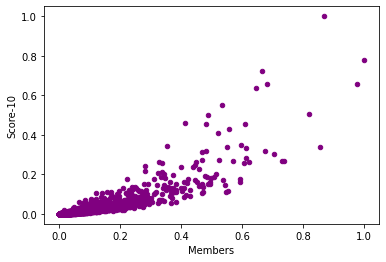

In [ ]:
data.plot.scatter(x='Members',y='Score-10', color="purple")

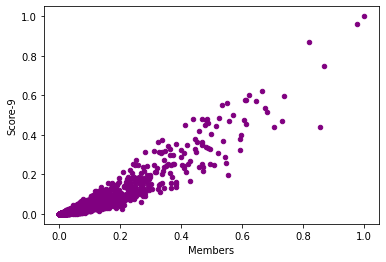

In [ ]:
data.plot.scatter(x='Members',y='Score-9', color="purple")

Statistic: 4048.222
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


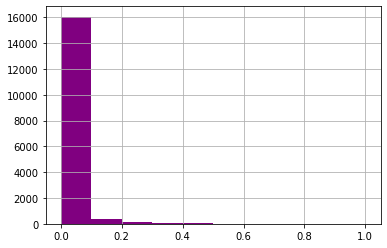

In [ ]:
data.Members.hist(color="purple")
generate_anderson(data.Members)


Nenhum dos dados seguem uma normal, logo o teste de hipotese a ser utilizado seria o mann-whitney, pois a comparação seria entre membros não-pariados e não-paremétricos. 

Shoujo e Comedia

,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,members_log,Score-10/1
count,262.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,0.691167,0.006596,0.022717,0.004647,0.003579,0.017223,0.010840,0.013480,13700.343972,0.005358,0.009334,0.016347,0.022871,0.017814,0.013203,0.007768,0.005904,0.005764,0.003765,0.845301,0.841483,4.057160,0.959920
std,0.100250,0.008354,0.047752,0.015905,0.008305,0.039461,0.023100,0.026372,25515.640268,0.015211,0.026196,0.041865,0.050512,0.034198,0.023735,0.014816,0.011529,0.011765,0.007302,0.102470,0.103739,0.867809,0.619822
min,0.325613,0.000000,0.000091,0.000000,0.000010,0.000000,0.000011,0.000160,86.000000,0.000003,0.000000,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.490385,0.490385,2.426511,-0.996366
25%,0.618529,0.000000,0.000846,0.000022,0.000105,0.000366,0.000338,0.000509,866.250000,0.000070,0.000081,0.000182,0.000543,0.000661,0.000641,0.000397,0.000317,0.000355,0.000296,0.778846,0.769231,3.346645,0.547127
50%,0.704360,0.003599,0.004646,0.000234,0.000460,0.002845,0.001570,0.001723,3904.000000,0.000529,0.000821,0.001976,0.004139,0.003805,0.003153,0.001553,0.001267,0.001242,0.000933,0.865385,0.855769,4.081415,1.023577
75%,0.762602,0.010471,0.021078,0.001506,0.002568,0.015493,0.009422,0.012890,12828.000000,0.003059,0.005312,0.011767,0.023104,0.019838,0.014617,0.008308,0.006069,0.005696,0.003541,0.932692,0.932692,4.737276,1.407154
max,0.911444,0.055955,0.341156,0.168117,0.058234,0.304697,0.159532,0.168805,150031.000000,0.144687,0.232048,0.325154,0.423038,0.272886,0.159056,0.116877,0.100559,0.106898,0.053187,1.000000,0.990385,5.946188,2.260912


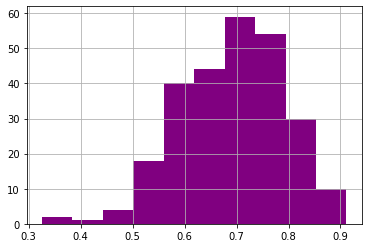

In [ ]:
#Tem comédia e shoujo
data[data['Genders'].str.contains('Comedy') & data['Genders'].str.contains('Shoujo')].Score.hist(color="purple")
data[data['Genders'].str.contains('Comedy') & data['Genders'].str.contains('Shoujo')].describe()

,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,members_log,Score-10/1
count,420.000000,462.000000,462.000000,462.000000,462.000000,4.620000e+02,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.666599,0.004328,0.013385,0.001899,0.002051,9.628316e-03,0.005355,0.007921,9468.792208,0.002920,0.004863,0.008268,0.012057,0.010835,0.009017,0.006589,0.005742,0.006418,0.004150,0.835831,0.832959,3.819233,0.809042
std,0.101927,0.007064,0.031539,0.007668,0.005550,2.459759e-02,0.013877,0.020807,20950.931374,0.009509,0.015770,0.024128,0.030147,0.025512,0.022082,0.019871,0.019579,0.026898,0.018024,0.125736,0.126695,0.803373,0.588056
min,0.370572,0.000000,0.000033,0.000000,0.000005,9.163438e-07,0.000011,0.000063,62.000000,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490385,0.471154,2.071882,-0.698970
25%,0.599114,0.000000,0.000582,0.000011,0.000060,2.771940e-04,0.000188,0.000368,658.500000,0.000042,0.000037,0.000096,0.000307,0.000462,0.000537,0.000250,0.000226,0.000236,0.000207,0.730769,0.730769,3.187159,0.380594
50%,0.667575,0.000654,0.001853,0.000082,0.000192,1.154135e-03,0.000612,0.000824,1916.500000,0.000189,0.000270,0.000613,0.001475,0.001743,0.001578,0.000918,0.000769,0.000709,0.000593,0.875000,0.875000,3.683922,0.813816
75%,0.737398,0.003927,0.010171,0.000591,0.001220,6.658956e-03,0.003321,0.003686,7062.000000,0.001367,0.002043,0.004154,0.008102,0.008972,0.007473,0.004285,0.003654,0.003291,0.002156,0.942308,0.932692,4.420984,1.215492
max,0.929155,0.057919,0.250266,0.086377,0.050550,1.877854e-01,0.129135,0.173379,177743.000000,0.105046,0.159316,0.214396,0.233019,0.238619,0.219151,0.228602,0.271972,0.453449,0.324987,1.000000,1.000000,5.811643,2.183721


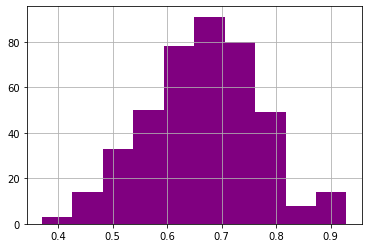

In [ ]:
#Tem só shoujo
data[~data['Genders'].str.contains('Comedy') & data['Genders'].str.contains('Shoujo')].Score.hist(color="purple")
data[~data['Genders'].str.contains('Comedy') & data['Genders'].str.contains('Shoujo')].describe()

,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,members_log,Score-10/1
count,4297.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000,5557.000000
mean,0.659506,0.005075,0.018466,0.003344,0.003541,0.014410,0.007532,0.009436,10192.877452,0.004682,0.008220,0.014082,0.019082,0.014767,0.010845,0.006864,0.005582,0.005515,0.004134,0.864769,0.860002,3.657441,0.627647
std,0.114846,0.022523,0.055674,0.025539,0.020694,0.047518,0.031696,0.035539,25530.070605,0.025567,0.038189,0.051749,0.055940,0.038986,0.028294,0.019990,0.016989,0.017601,0.015080,0.122512,0.123613,1.014747,0.695895
min,0.021798,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000006,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.623249,-1.556303
25%,0.588556,0.000000,0.000203,0.000000,0.000029,0.000083,0.000080,0.000309,210.000000,0.000013,0.000006,0.000020,0.000066,0.000143,0.000192,0.000123,0.000136,0.000158,0.000207,0.817308,0.817308,2.745855,0.079181
50%,0.662125,0.001309,0.001602,0.000027,0.000151,0.000915,0.000484,0.000641,1405.000000,0.000125,0.000157,0.000423,0.001185,0.001597,0.001442,0.000826,0.000724,0.000709,0.000563,0.894231,0.894231,3.621176,0.620536
75%,0.739782,0.003927,0.010770,0.000283,0.000985,0.007465,0.002815,0.002925,7007.000000,0.001269,0.002158,0.005371,0.011168,0.010365,0.007867,0.004399,0.003597,0.003508,0.002459,0.951923,0.942308,4.445915,1.175620
max,1.000000,1.000000,0.868278,1.000000,1.000000,0.843595,1.000000,1.000000,329800.000000,1.000000,0.868826,0.903727,0.941944,0.573974,0.426853,0.343150,0.308260,0.352700,0.497941,1.000000,1.000000,6.351884,2.546716


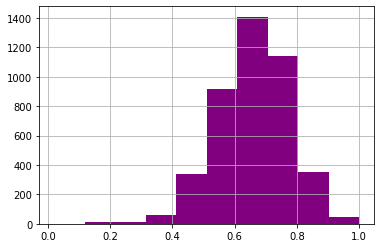

In [ ]:
#Tem só comédia
data[data['Genders'].str.contains('Comedy') & ~data['Genders'].str.contains('Shoujo')].Score.hist(color="purple")
data[data['Genders'].str.contains('Comedy') & ~data['Genders'].str.contains('Shoujo')].describe()

In [ ]:
stats.mannwhitneyu(data[~data['Genders'].str.contains('Shoujo') & data['Genders'].str.contains('Comedy')].Score,data[~data['Genders'].str.contains('Comedy') & data['Genders'].str.contains('Action')].Score)

MannwhitneyuResult(statistic=6294320.5, pvalue=1.3545742338883725e-23)

In [ ]:
stats.mannwhitneyu(data[~data['Genders'].str.contains('Shoujo') & data['Genders'].str.contains('Comedy')].Members,data[~data['Genders'].str.contains('Comedy') & data['Genders'].str.contains('Action')].Members)

MannwhitneyuResult(statistic=6286215.5, pvalue=5.9688861894542366e-24)

Para o Score vemos que os dados não são iguais, pois o p-value teve um valor pequeno, sendo a hipotese nula rejeitada

P-value grande mostra que estatisticamente os dados são parecidos no caso de membros. Que temos o p-value acima de 5.


,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,members_log,Score-10/1
count,56.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.762602,0.003192,0.112723,0.035542,0.020780,0.088761,0.040673,0.041768,64824.789474,0.040691,0.070872,0.094159,0.094349,0.063097,0.042517,0.031343,0.024837,0.023570,0.016978,0.901316,0.896255,5.000805,1.282620
std,0.104320,0.004173,0.176650,0.110586,0.046138,0.164845,0.073770,0.080919,71652.145624,0.110424,0.156620,0.162859,0.146905,0.102020,0.071845,0.061949,0.055651,0.054483,0.033197,0.053274,0.058027,0.750663,0.600095
min,0.403270,0.000000,0.000247,0.000000,0.000046,0.000009,0.000122,0.000137,448.000000,0.000013,0.000004,0.000020,0.000072,0.000138,0.000104,0.000037,0.000023,0.000079,0.000030,0.701923,0.701923,2.827369,-0.584379
25%,0.722071,0.000000,0.010929,0.000489,0.001333,0.004940,0.003012,0.002267,12103.000000,0.001051,0.003083,0.005805,0.009236,0.009022,0.008244,0.006420,0.005022,0.004651,0.003052,0.875000,0.865385,4.452277,0.921805
50%,0.777248,0.003272,0.059466,0.002191,0.003390,0.043619,0.008413,0.006600,33370.000000,0.010725,0.022881,0.047631,0.052082,0.037361,0.023274,0.014528,0.011334,0.009854,0.006904,0.894231,0.884615,5.187580,1.437541
75%,0.825272,0.003927,0.111382,0.020662,0.013810,0.074294,0.040587,0.052579,100288.000000,0.028119,0.052829,0.092725,0.091353,0.064894,0.041637,0.029709,0.022284,0.021403,0.016149,0.932692,0.932692,5.460084,1.706352
max,0.941417,0.023887,1.000000,0.789505,0.293886,0.983290,0.399395,0.462675,264465.000000,0.779795,1.000000,0.905855,0.663308,0.540986,0.415845,0.407398,0.382372,0.381632,0.220510,1.000000,1.000000,6.413225,2.211947


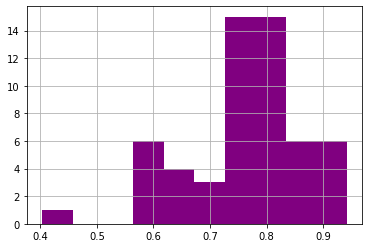

In [ ]:
#Thriller e Mystery juntos
data[data['Genders'].str.contains('Thriller') & data['Genders'].str.contains('Mystery')].Score.hist(color="Purple")
data[data['Genders'].str.contains('Thriller') & data['Genders'].str.contains('Mystery')].describe()

,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,members_log,Score-10/1
count,587.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,0.711873,0.003136,0.038624,0.008576,0.007421,0.028619,0.015473,0.018498,24862.378717,0.011235,0.019581,0.028836,0.033497,0.024699,0.018049,0.013439,0.010934,0.010862,0.008353,0.870365,0.867852,4.201818,0.981430
std,0.117016,0.004810,0.087135,0.038703,0.029533,0.077857,0.035574,0.038844,43698.854831,0.043673,0.066599,0.079359,0.078681,0.057644,0.044272,0.040393,0.035898,0.038540,0.028071,0.108679,0.109361,0.960246,0.662392
min,0.208447,0.000000,0.000008,0.000000,0.000000,0.000000,0.000000,0.000011,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144231,0.144231,1.724276,-1.021189
25%,0.638283,0.000000,0.001386,0.000019,0.000116,0.000604,0.000383,0.000446,1443.500000,0.000072,0.000107,0.000307,0.000867,0.001104,0.000969,0.000511,0.000385,0.000315,0.000326,0.817308,0.817308,3.558820,0.529561
50%,0.726158,0.001309,0.006422,0.000190,0.000553,0.003947,0.001426,0.001408,5007.000000,0.000739,0.001179,0.002932,0.005839,0.004644,0.003341,0.001873,0.001448,0.001222,0.001126,0.894231,0.894231,4.221727,1.074246
75%,0.792234,0.003927,0.036319,0.001789,0.005020,0.021161,0.015648,0.016310,28762.500000,0.004855,0.010196,0.021108,0.028170,0.021170,0.016131,0.009556,0.006889,0.006070,0.005274,0.951923,0.951923,4.973507,1.513854
max,0.997275,0.050393,0.977542,0.706004,0.638136,1.000000,0.333463,0.268193,274277.000000,0.658750,0.961937,1.000000,0.860986,0.601470,0.531254,0.590026,0.535823,0.542846,0.327713,1.000000,1.000000,6.403360,2.297040


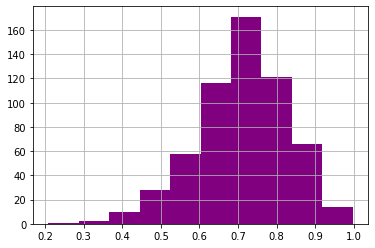

In [ ]:
#Só Mystery
data[~data['Genders'].str.contains('Thriller') & data['Genders'].str.contains('Mystery')].Score.hist(color="Purple")
data[~data['Genders'].str.contains('Thriller') & data['Genders'].str.contains('Mystery')].describe()

,Score,Episodes,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Finished,Estreia,members_log,Score-10/1
count,58.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.675843,0.002608,0.053776,0.025512,0.013995,0.038252,0.020162,0.019500,36184.58209,0.025106,0.034408,0.037529,0.032640,0.021701,0.015195,0.011510,0.009643,0.009721,0.010123,0.909874,0.908582,4.057235,0.612921
std,0.180489,0.003961,0.121841,0.107903,0.038915,0.098541,0.049638,0.045207,69687.63654,0.089497,0.096455,0.091732,0.069174,0.043873,0.031050,0.025260,0.020820,0.020062,0.024217,0.084621,0.085813,1.154735,0.924242
min,0.227520,0.000000,0.000016,0.000000,0.000003,0.000014,0.000005,0.000011,36.00000,0.000000,0.000000,0.000000,0.000003,0.000021,0.000032,0.000012,0.000000,0.000000,0.000000,0.557692,0.557692,1.863323,-1.469152
25%,0.545981,0.000000,0.000532,0.000005,0.000055,0.000134,0.000085,0.000280,397.50000,0.000023,0.000022,0.000068,0.000163,0.000276,0.000353,0.000283,0.000283,0.000394,0.000385,0.884615,0.884615,3.148900,-0.110924
50%,0.700272,0.000000,0.002043,0.000082,0.000349,0.001340,0.000702,0.000778,2708.00000,0.000166,0.000215,0.000508,0.001550,0.002972,0.003357,0.002711,0.002262,0.002838,0.002400,0.932692,0.932692,3.726156,0.622745
75%,0.822888,0.003763,0.058514,0.005459,0.004504,0.032770,0.016292,0.012518,41427.50000,0.009320,0.017908,0.040761,0.040079,0.023675,0.015226,0.009051,0.007794,0.009302,0.009882,0.971154,0.971154,5.179775,1.437786
max,0.989101,0.020288,0.683961,0.807182,0.241976,0.519913,0.324214,0.203766,425531.00000,0.655423,0.515569,0.581658,0.437909,0.252730,0.170168,0.142334,0.115988,0.111707,0.155679,1.000000,1.000000,6.248258,2.008394


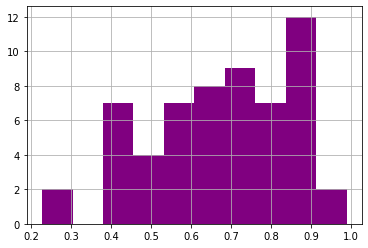

In [ ]:
#Só Thriller
data[data['Genders'].str.contains('Thriller') & ~data['Genders'].str.contains('Mystery')].Score.hist(color="Purple")
data[data['Genders'].str.contains('Thriller') & ~data['Genders'].str.contains('Mystery')].describe()

In [ ]:
stats.mannwhitneyu(data[~data['Genders'].str.contains('Thriller') & data['Genders'].str.contains('Mystery')].Score,data[~data['Genders'].str.contains('Mystery') & data['Genders'].str.contains('Thriller')].Score)

MannwhitneyuResult(statistic=20997.0, pvalue=0.39838631862054635)

In [ ]:
stats.mannwhitneyu(data[~data['Genders'].str.contains('Thriller') & data['Genders'].str.contains('Mystery')].Members,data[~data['Genders'].str.contains('Mystery') & data['Genders'].str.contains('Thriller')].Members)

MannwhitneyuResult(statistic=19560.5, pvalue=0.12261717107164016)

Pelo teste de hipotese, vemos que os dados não são iguais, pois o p-value teve um valor pequeno, sendo a hipotese nula rejeitada